# W03: Variational Calculus - Visualizing the Variational Principle

**Last revised:** Sep 10, 2021 by Heiko Hergert [hergert@frib.msu.edu]<br>
Based in part on work by Dick Furnstahl [furnstahl.1@osu.edu].

## Introduction

Consider the functional

$\begin{align}
  I[y] = \int_{x_1}^{x_2} f[y(x), y'(x), x] \, dx\tag{1}
\end{align}$

with $y_1 = y(x_1)$ and $y_2 = y(x_2)$ fixed.  We denote by $y^*(x)$ the path that minimizes the functional $I$ (or, more generally, makes it stationary).  Then we consider the class of candidate paths $y(x)$ given by

$\begin{align}
  y(x) = y^*(x) + \epsilon \eta(x)\tag{2}
\end{align}$

where $\eta(x)$ is some function that vanishes at the endpoints: $\eta(x_1) = \eta(x_2) = 0$.  We can derive the Euler-Lagrange equations by minimizing $I(\epsilon)$ with respect to $\epsilon$, which is equivalent to determining the zeroes of the functional derivative
$$\begin{align}
  \frac{\delta I}{\delta y} = \frac{d}{dx}\frac{\partial f}{\partial y'} - \frac{\partial f}{\partial y} \overset{!}{=} 0\,.\tag{3}
\end{align}$$

Here we visualize this problem by considering a particular functional $I$, choosing among some possible $\eta(x)$ definitions, and seeing how $I(\epsilon)$ is minimized with respect to $\epsilon$.  We will also allow for an incorrect determination of $y^*(x)$, in which case we expect that the minimum $\epsilon$ will give us a reasonable reproduction of the true $y^*(x)$.  The variation of $\epsilon$ and the choice of functions will be made using widgets from `ipywidgets`.



In [1]:
# We'll use `%matplotlib notebook` so that we can modify figures without redrawing them.
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import display


## Finding the Optimal Path

Find the equation of the path from the origin $O$ to the point $P(1,1)$ in the $xy$ plane that makes the integral 

$$\begin{align}
  I[y] = \int_{x_1}^{x_2}dx (y'^2 + y y' + y^2) \tag{4}
\end{align}$$

stationary.  

Our "Lagrangian" is given by
$$\begin{equation}
 f(y,y',x) = y'^2 + yy'+ y^2\,, \tag{5}
\end{equation}$$
and we have
$$\begin{align}
    \frac{\partial f}{\partial y'} &= 2y' + y\,,\tag{6}\\
    \frac{\partial f}{\partial y} &= 2y + y'\,.\tag{7}
\end{align}$$
Plugging this into the Euler-Lagrange equation, we have
$$\begin{equation}
 \frac{d}{dx} \frac{\partial f}{\partial y'} - \frac{\partial f}{\partial y} = 2y'' - 2y = 0\,,\tag{8}
\end{equation}$$
or
$$\begin{equation}
 y'' - y = 0\,.\tag{9}
\end{equation}$$
The general solution to this ODE is given by
$$\begin{equation}
    y(x) = A \sinh x + B \cosh x\,.\tag{10}
\end{equation}$$

Now we can use the boundary conditions: The path is supposed to connect the origin to the point $(1,1)$ in the $xy$-plane, so we have
$$\begin{align}
  0 &= A \underbrace{\sinh 0}_{=0} + B \underbrace{\cosh 0}_{=1} = B\,,  \tag{11}\\
  1 &= A \sinh 1 + B \cosh 1 = A \sinh 1 \tag{12}\,,
\end{align}$$
so the optimal path is
$$\begin{equation}
  y^*(x) = \frac{\sinh x}{\sinh 1}\,.\tag{13}
\end{equation}$$



In [3]:
def y_star(x):
    """Path that minimizes the functional."""
    return np.sinh(x) / np.sinh(1.)

In [4]:
def functional(x_pts, y_pts):
    """Given arrays of x and y points, evaluate the functional."""
    # The numpy gradient function takes the derivative of an array y_pts
    #  that is a function of points x in x_pts.
    y_deriv_pts = np.gradient(y_pts, x_pts)
    f = y_deriv_pts**2 + y_pts * y_deriv_pts + y_pts**2
    
    # Use the numpy trapezoid rule (trapz) to do the integral over f.
    return np.trapz(f, x_pts)

## Plot of the functional evaluation versus $\epsilon$

<IPython.core.display.Javascript object>


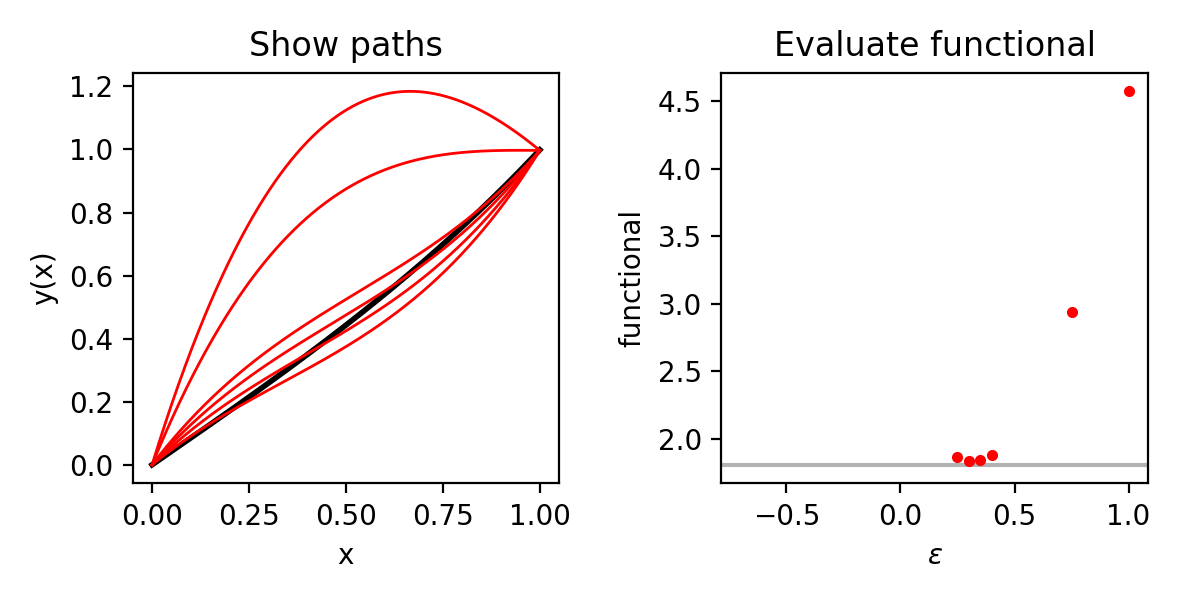

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='$\\epsilon$', max=1.0, min=…

Button(description='reset graph', style=ButtonStyle())

In [5]:
delta_x = 0.001
x_pts = np.arange(0., 1., delta_x)

fig = plt.figure(figsize=(6,3), 
                 num='Visualizing stationary paths of a functional')
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# We pass a function that evaluates the functional to setup_figure - in this way, we can easily swap it.
def setup_figure(evaluate_functional, y_star):
    ax1.set_title('Show paths')
    ax1.plot(x_pts, y_star(x_pts), color='black', lw=2)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y(x)')
    
    ax2.set_title('Evaluate functional')
    ax2.set_xlabel(r'$\epsilon$')
    ax2.set_ylabel('functional')
#     ax2.set_xlim(-0.4, 0.4)
#     ax2.set_ylim(1.5, 3.)
#     #ax2.axvline(0., color='black', alpha=0.3)
    ax2.axhline(evaluate_functional(x_pts, y_star(x_pts)), 
                                    color='black', alpha=0.3)
    
    fig.tight_layout()

def make_path(epsilon, evaluate_functional_passed, ax1_passed, ax2_passed,
              base_function='exact', eta_function='sine'):
    """Given a base function, which may be the exact y^*(x) or a guess that
       is not correct, generate and plot the path corresponding to adding
       epsilon*eta(x) to the base function, with eta(x) chosen among some
       functions that vanish at the endpoints in x.
    """
    # map x_pts to zero to 1 (it may already be there)
    x_mapped_pts = (x_pts - x_pts[0]) / (x_pts[-1] - x_pts[0])

    # Choices for the base function
    if (base_function == 'exact'):
        base = lambda x : y_star(x)
    elif (base_function == 'guess 1'):
        base = lambda x : np.sinh(2.*x) / np.sinh(2.)
    elif (base_function == 'guess 2'):
        base = lambda x : x**3
    elif (base_function == 'terrible guess'):
        base = lambda x : np.sin(5./2.*np.pi*x)

    
    if (eta_function == 'sine'):
        eta = lambda x : np.sin(np.pi * x)
    elif (eta_function == 'parabola'):
        eta = lambda x : 4. * x * (1. - x)
    
    y_new_pts = base(x_pts) + epsilon * eta(x_mapped_pts)

    func = evaluate_functional_passed(x_pts, y_new_pts)
    
    ax1_passed.plot(x_pts, y_new_pts, color='red', lw=1)
    ax2_passed.plot(epsilon, func, '.', color='red')

    
# Make sure to pass the functional you defined to the widget!
def reset_graph(event):
    ax1.clear()
    ax2.clear()
    setup_figure(functional, y_star)
    
button = widgets.Button(
    description='reset graph'
)
button.on_click(reset_graph)

widgets.interact(make_path, 
                 epsilon=widgets.FloatSlider(min=-1., max=1., step=.05,
                                           value=0.0, description=r'$\epsilon$', 
                                           continuous_update=False), 
                 evaluate_functional_passed=widgets.fixed(functional),
                 ax1_passed=widgets.fixed(ax1), 
                 ax2_passed=widgets.fixed(ax2),
                 base_function=widgets.Dropdown(options=['exact', 'guess 1',
                                                         'guess 2','terrible guess'],
                                                value='exact',
                                                description='base function'),
                 eta_function=widgets.Dropdown(options=['sine', 'parabola'],
                                               value='sine',
                                               description=r'$\eta(x)$')
                )

# Fire away.
setup_figure(functional,y_star)    
button



<div class="alert alert-block alert-info">

We can use the widget to explore the behavior of $I(\epsilon)$ under variations of the path.
    
- Try out different combinations of the starting path and variational functions $\eta(x)$. How does $I(\epsilon)$ vary with $\epsilon$? Can you explain this behavior? (Hint: Think about Taylor expansions of a function.)    
- Explore other functionals of your choice by defining your own `functional` and `y_star` routines (see above). 
</div>